# SIT307 - Machine Learning Challenge (Assignment 3)

Our chosen dataset is [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

Prepared by

| Student           | Student ID |
|-------------------|------------|
| HOOMAN SHYKHIPOUR | 220060109  |
| SARAH GOSLING     | 220094149  |
| DEVIN JAYASINGHE  | 220228075  |
| RYAN WAITES       | 215127684  |
| ANTHONY GEORGE    | 220180567  |
| MATT KINNIA       | 219311697  |

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno

In [2]:
# Ignore inline warnings thrown by packages
warnings.filterwarnings("ignore")

In [3]:
life_df = pd.read_csv('Cleaned_Life_Expectancy_Data.csv', delimiter=',')

# Section 1: Introduction

# Section 2: Machine Learning

## Section 2.1: Regression

In [4]:
# Import the required packages for out regression models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
# Pull the required columns from the source dataset.
reg_life_df = life_df[["STATUS", "LIFE_EXPECTANCY", "ALCOHOL", "ADULT_MORTALITY","MEASLES","POLIO","DIPHTHERIA", "BMI", "INFANT_DEATHS","THINNESS_5-9_YEARS","THINNESS_10-19_YEARS", "SCHOOLING","INCOME_COMPOSITION_OF_RESOURCES"]]
reg_life_df = reg_life_df.dropna()

# Define our x (independent) and y (dependent) variables for our regression models.
x = reg_life_df[["STATUS", "ALCOHOL", "ADULT_MORTALITY", "BMI", "INFANT_DEATHS","MEASLES","POLIO","DIPHTHERIA","THINNESS_5-9_YEARS","THINNESS_10-19_YEARS", "SCHOOLING","INCOME_COMPOSITION_OF_RESOURCES"]]
y = reg_life_df["LIFE_EXPECTANCY"]

In [6]:
# Split our dataset into training and testing samples. We are using 80% for training and 20% for testing.
# NOTE: Using a the "random_state" parameter ensures we get repeatable results for each execution.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Mean Absolute Error (MAE) for testing
def mae(y_true, y_prediction):
    return np.mean(np.abs(y_prediction - y_true)) 

### Linear Regression

Using an ordinary least squares Linear Regression model we can predict `LIFE_EXPECTANCY` using a one or more explanatory features.

In [8]:
# Create and train the ordinary least squares Linear Regression model based on our training data.
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [9]:
# Run a prediction using our testing data.
y_pred = linear_regression.predict(x_test)

#### Performance

TODO: Add some commentary on model performance 

In [10]:
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Coefficient of determination: 0.9238680302251873
Mean squared error: 6.530865259277737


[Text(0.5, 1.0, 'Actual vs. Predicted Life Expectancy'),
 Text(0.5, 0, 'Actual Value'),
 Text(0, 0.5, 'Predicted Value')]

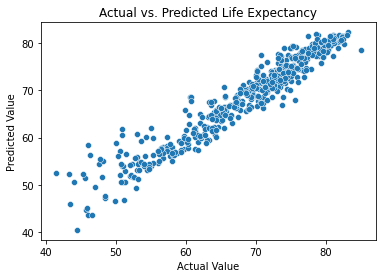

In [11]:
# Plot actual vs predicted values.
plot = sns.scatterplot(x=y_test, y=y_pred)
plot.set(title="Actual vs. Predicted Life Expectancy", xlabel="Actual Value", ylabel="Predicted Value")

### Lasso Regression 

In [12]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import StandardScaler

In [13]:
##  finding best ALPHA value for L1 regularization,implementing lassoCV
# Scale the data 
std = StandardScaler()
std.fit(x_train.values)
# Scale the Predictors for the train and test set
x_train_scaled = std.transform(x_train.values)
x_test_scaled = std.transform(x_test.values)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(x_train_scaled, y_train)
# This is the best alpha value found
lasso_model.alpha_ 


0.012173827277396614

In [14]:
# showing all coefficients with optimal alpha
list(zip(x_train.columns, lasso_model.coef_))

[('STATUS', 0.12540144182981428),
 ('ALCOHOL', -0.01712369191563201),
 ('ADULT_MORTALITY', -4.479060598744765),
 ('BMI', 0.18181222245651896),
 ('INFANT_DEATHS', 0.15874142618205428),
 ('MEASLES', -0.2850918092368945),
 ('POLIO', -0.0),
 ('DIPHTHERIA', 1.0785488519160238),
 ('THINNESS_5-9_YEARS', -0.036196874877915605),
 ('THINNESS_10-19_YEARS', -0.11107439652977479),
 ('SCHOOLING', 0.0),
 ('INCOME_COMPOSITION_OF_RESOURCES', 3.9669492280262606)]

In [15]:
# find the Mean absolute error (MAE) on test data
mae(y_test, lasso_model.predict(x_test_scaled))

1.816059783150613

In [16]:
print(f"Coefficient of determination: {r2_score(y_test, lasso_model.predict(x_test_scaled))}")
print(f"Mean squared error: {mean_squared_error(y_test,lasso_model.predict(x_test_scaled))}")

Coefficient of determination: 0.9240796076950468
Mean squared error: 6.512715407754935


In [17]:
from sklearn.linear_model import lars_path
print("Regularization path computation using the LARS ...")
alphas, _, coefs = lars_path(x_train_scaled, y_train.values, method='lasso')

Regularization path computation using the LARS ...


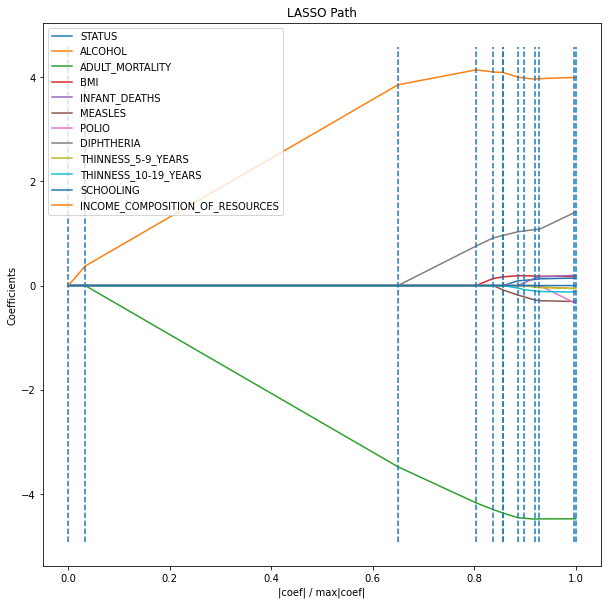

In [18]:
# plotting the LARS path
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(x_train.columns)
plt.show()

### Artificial Neural Network

In [19]:
reg_life_df.shape

(2736, 13)

In [20]:
# Pull the required columns from the source dataset.
reg_life_df = life_df[["STATUS", "LIFE_EXPECTANCY", "ALCOHOL", "ADULT_MORTALITY", "BMI", "INFANT_DEATHS", "SCHOOLING", "COUNTRY"]]
reg_life_df = reg_life_df.dropna()

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn import metrics

# split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# standardise the features individually before applying ML
sc=StandardScaler()

# fit standardised features
scaler = sc.fit(x_train)

# transform train and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#mlp = MLPRegressor(random_state=1, max_iter=10000).fit(x_train, y_train)
mlp = MLPRegressor(hidden_layer_sizes=(150),
                   max_iter = 10000, 
                   activation = 'relu',
                   solver = 'adam').fit(x_train_scaled, y_train)

# get prediction from test data 
predict_test = mlp.predict(x_test_scaled)

In [22]:
# print coefficients and errors
print(f"Coefficient of determination: {r2_score(y_test, predict_test)}")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

Coefficient of determination: 0.9556543971233376
Mean Absolute Error: 1.3113520910720173
Mean Squared Error: 3.8041201099296487
Root Mean Squared Error: 1.9504153685637449


[Text(0.5, 1.0, 'Actual vs. Predicted Life Expectancy'),
 Text(0.5, 0, 'Actual Value'),
 Text(0, 0.5, 'Predicted Value')]

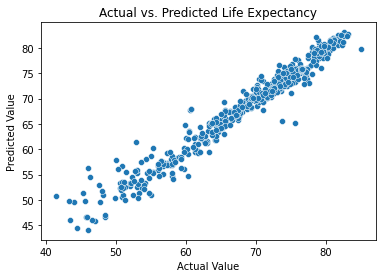

In [23]:
# Plot actual vs predicted values.
plot = sns.scatterplot(x=y_test, y=predict_test)
plot.set(title="Actual vs. Predicted Life Expectancy", xlabel="Actual Value", ylabel="Predicted Value")

In [24]:
# compare actual data with predicted
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
783,70.2,68.608839
1615,69.6,68.791612
410,53.3,54.768536
1852,79.1,79.510794
523,45.7,44.771927


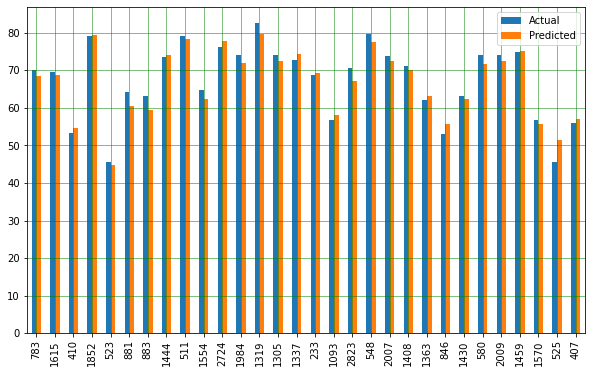

In [25]:
# visualise actual vs predicted
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

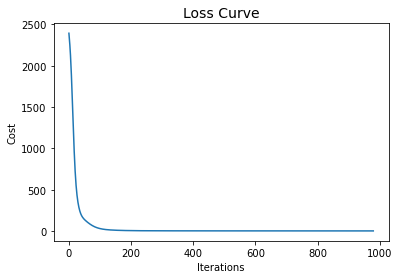

In [26]:
# plot the loss curve of the ML algorithm
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()